<a href="https://colab.research.google.com/github/auliyaf/Patech/blob/main/Patech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Research Goals**
Memprediksi kemungkinan terjadi antarknosa pada cabai (none, low, moderate, high) berdasarkan suhu udara, durasi, dan intensitas hujan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#**Retrieving Data**
Data diambil dari https://enviroweather.msu.edu/run.php?stn=msu&mod=f_anb&da1=8&mo1=6&da2=22&mo2=6&yr=2016&mc=540&ds=cd pada rentang tahun 2016-2020

In [ ]:
url = 'https://raw.githubusercontent.com/auliyaf/Patech/main/DatasetPatech.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,WetPeriod,Station,Start of Wetting Period,End of Wetting Period,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Anthracnose risk,Wet hrs @ avg temp required for infection,Progress toward infection
0,1,East Lansing (MSUHort),1/5/2016 7:55,1/5/2016 8:25,0.6,10.6,0.00,None,0.0,0%
1,2,East Lansing (MSUHort),1/8/2016 12:45,1/10/2016 10:55,46.3,38.0,0.66,None,0.0,74%
2,3,East Lansing (MSUHort),1/14/2016 12:00,1/14/2016 14:40,2.8,32.0,0.02,None,0.0,0%
3,4,East Lansing (MSUHort),1/15/2016 2:45,1/15/2016 3:50,1.2,38.7,0.00,None,0.0,0%
4,5,East Lansing (MSUHort),1/15/2016 15:40,1/16/2016 2:45,11.2,36.0,0.05,None,0.0,1%


#**EDA & Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   WetPeriod                                  1386 non-null   int64  
 1   Station                                    1386 non-null   object 
 2   Start of Wetting Period                    1386 non-null   object 
 3   End of Wetting Period                      1386 non-null   object 
 4   Duration (Hrs.)                            1386 non-null   float64
 5   Avg. Temp(F)                               1386 non-null   float64
 6   Rainfall (in.)                             1386 non-null   float64
 7   Anthracnose risk                           1386 non-null   object 
 8   Wet hrs @ avg temp required for infection  1386 non-null   float64
 9   Progress toward infection                  1386 non-null   object 
dtypes: float64(4), int64(1),

In [ ]:
#deskripsi statistik
df.describe()

,WetPeriod,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Wet hrs @ avg temp required for infection
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,125.113997,9.471212,48.913709,0.111494,12.035859
std,85.296290,11.350305,14.783013,0.308124,9.593624
min,1.000000,0.100000,-9.300000,0.000000,0.000000
25%,50.000000,2.800000,37.300000,0.000000,0.000000
50%,111.000000,7.800000,50.400000,0.000000,13.000000
75%,198.000000,12.000000,60.600000,0.050000,18.100000
max,309.000000,185.000000,85.900000,2.760000,34.800000


In [ ]:
#jumlah baris, kolom
df.shape

(1386, 10)

In [ ]:
#cek duplikat
df[df.duplicated()]

,WetPeriod,Station,Start of Wetting Period,End of Wetting Period,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Anthracnose risk,Wet hrs @ avg temp required for infection,Progress toward infection


In [ ]:
#cek jumlah data unik per kolom
df.nunique()

WetPeriod                                     309
Station                                         1
Start of Wetting Period                      1386
End of Wetting Period                        1386
Duration (Hrs.)                               269
Avg. Temp(F)                                  515
Rainfall (in.)                                112
Anthracnose risk                                4
Wet hrs @ avg temp required for infection      43
Progress toward infection                     185
dtype: int64

In [ ]:
#cek data NaN
df.isna().sum()

WetPeriod                                    0
Station                                      0
Start of Wetting Period                      0
End of Wetting Period                        0
Duration (Hrs.)                              0
Avg. Temp(F)                                 0
Rainfall (in.)                               0
Anthracnose risk                             0
Wet hrs @ avg temp required for infection    0
Progress toward infection                    0
dtype: int64

In [ ]:
#drop kolom yang tdk perlu di perhitungan
df.drop(columns=["WetPeriod","Station","Start of Wetting Period","End of Wetting Period","Wet hrs @ avg temp required for infection","Progress toward infection"], inplace=True)

In [ ]:
df

,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Anthracnose risk
0,0.6,10.6,0.00,None
1,46.3,38.0,0.66,None
2,2.8,32.0,0.02,None
3,1.2,38.7,0.00,None
4,11.2,36.0,0.05,None
...,...,...,...,...
1381,1.8,29.7,0.00,None
1382,12.6,33.9,0.02,None
1383,6.6,37.2,0.02,None
1384,6.3,37.4,0.12,None


In [ ]:
#Jumlah data yg tidak beresiko antarknosa
df["Anthracnose risk"].eq("None").sum()

1253

In [ ]:
#Jumlah data yg beresiko antarknosa rendah
df["Anthracnose risk"].eq("Low").sum()

95

In [ ]:
#Jumlah data yg beresiko antarknosa sedang
df["Anthracnose risk"].eq("Moderate").sum()

29

In [ ]:
#Jumlah data yg beresiko antarknosa tinggi
df["Anthracnose risk"].eq("High").sum()

9

In [ ]:
#Dividing data into features and labels
feature_columns = ['Duration (Hrs.)', 'Avg. Temp(F)', 'Rainfall (in.)']
X = df[feature_columns].values
y = df['Anthracnose risk'].values

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_new

,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Anthracnose risk
0,0.6,10.6,0.00,None
1,46.3,38.0,0.66,None
2,2.8,32.0,0.02,None
3,1.2,38.7,0.00,None
4,11.2,36.0,0.05,None
...,...,...,...,...
1381,1.8,29.7,0.00,None
1382,12.6,33.9,0.02,None
1383,6.6,37.2,0.02,None
1384,6.3,37.4,0.12,None


In [44]:
y_train_new

array([3, 3, 3, ..., 2, 2, 2])

In [43]:
len(X_train_new)

3992

In [41]:
len(y_train_new)

3992

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

<Figure size 432x288 with 0 Axes>

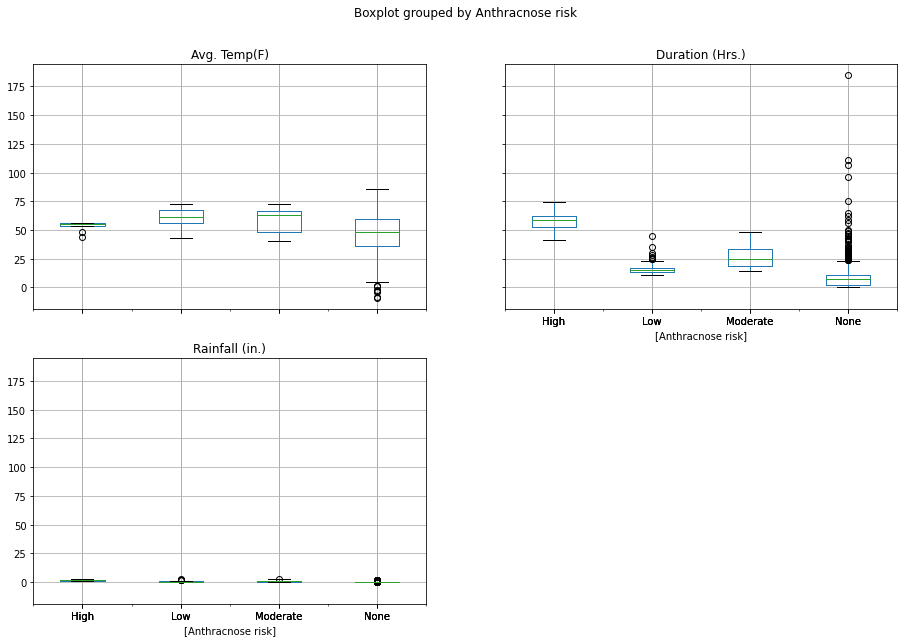

In [ ]:
#boxplot,cek outlier
plt.figure()
df.boxplot(by="Anthracnose risk", figsize=(15, 10))
plt.show()

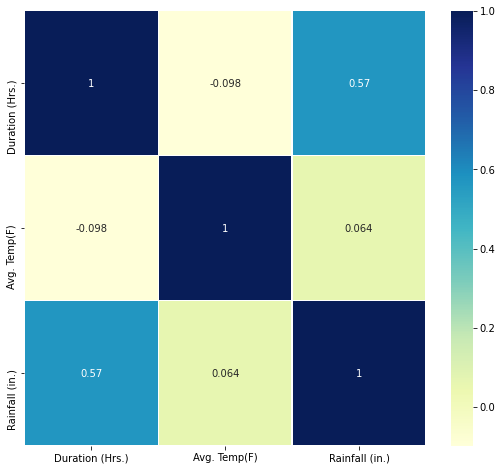

In [ ]:
#korelasi
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)
plt.show()

# **Data Modeling**

###**KNN**

In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1,   0,   0,   0],
       [  0,  12,   1,   3],
       [  0,   1,   5,   0],
       [  0,   1,   0, 254]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.84 %.


In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

<Figure size 432x288 with 0 Axes>

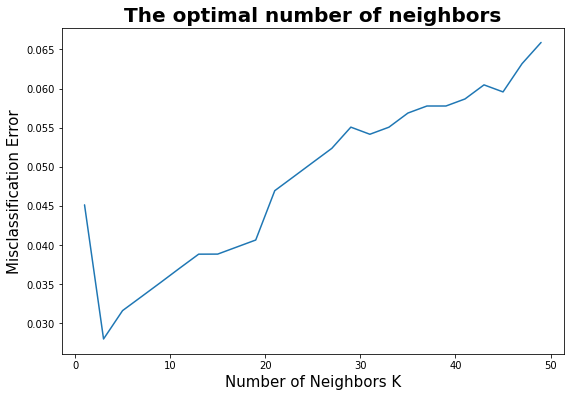

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(9,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


###**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1,   0,   0,   0],
       [  0,  12,   1,   3],
       [  0,   1,   5,   0],
       [  0,   1,   0, 254]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy = ' + str(round(accuracy, 2)) + ' %.')

Accuracy = 97.84 %.
